In [86]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:

csv_file ="cars.csv"
df = pd.read_csv(csv_file, sep=",")


In [3]:
train_df, test_df = train_test_split(df, test_size=0.20,random_state = 2)

In [4]:
train_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5571,Hyundai Verna CRDi 1.6 SX Option,2018,1150000,35000,Diesel,Individual,Manual,First Owner,22.00,1582.0,126.20,5.0
2038,Jeep Compass 2.0 Longitude Option BSIV,2017,1689999,60000,Diesel,Individual,Manual,First Owner,17.10,1956.0,170.00,5.0
2957,Hyundai Grand i10 1.2 Kappa Asta,2018,580000,25000,Petrol,Individual,Manual,First Owner,18.90,1197.0,81.86,5.0
7618,Mahindra Xylo E4,2011,150000,130000,Diesel,Individual,Manual,Second Owner,14.00,2498.0,112.00,7.0
6684,Hyundai i20 1.4 CRDi Asta,2011,320000,155000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3606,Ford Figo Aspire 1.5 TDCi Sports Edition,2017,620000,35000,Diesel,Individual,Manual,First Owner,24.29,1498.0,99.00,5.0
5704,Maruti Wagon R VXI BS IV,2015,335000,120000,Petrol,Individual,Manual,First Owner,20.51,998.0,67.04,5.0
6637,Tata Tiago 1.2 Revotron XZ,2017,450000,15000,Petrol,Individual,Manual,First Owner,23.84,1199.0,84.00,5.0
2575,Maruti Swift Dzire VDI,2017,651000,32500,Diesel,Individual,Manual,Second Owner,28.40,1248.0,74.02,5.0


In [66]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,18.802005,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,5.165302,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,-1.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.251852,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.100000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.070000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [6]:
name_des = df.groupby('name')['selling_price'].agg(['mean', 'min', 'max', 'quantile'])
fuel_des = df.groupby('fuel')['selling_price'].agg(['mean', 'min', 'max', 'quantile'])
seller_type_des = df.groupby('seller_type')['selling_price'].agg(['mean', 'min', 'max', 'quantile'])
transmission_des = df.groupby('transmission')['selling_price'].agg(['mean', 'min', 'max', 'quantile'])
owner_des = df.groupby('owner')['selling_price'].agg(['mean', 'min', 'max', 'quantile'])

In [7]:
name_des

,mean,min,max,quantile
name,,,,
Ambassador CLASSIC 1500 DSL AC,75000.0,75000,75000,75000.0
Ambassador Classic 2000 DSZ AC PS,99000.0,99000,99000,99000.0
Ambassador Grand 1500 DSZ BSIII,122000.0,122000,122000,122000.0
Ambassador Grand 2000 DSZ PW CL,200000.0,200000,200000,200000.0
Ashok Leyland Stile LE,300000.0,300000,300000,300000.0
...,...,...,...,...
Volvo V40 D3 R-Design,2475000.0,2475000,2475000,2475000.0
Volvo XC40 D4 Inscription BSIV,3800000.0,3800000,3800000,3800000.0
Volvo XC40 D4 R-Design,3400000.0,3400000,3400000,3400000.0


In [8]:
fuel_des

,mean,min,max,quantile
fuel,,,,
CNG,301017.491228,80000,545000,320000.0
Diesel,791452.921627,40000,7200000,550000.0
LPG,200421.052632,54000,375000,195500.0
Petrol,462441.061691,29999,10000000,345000.0


In [9]:
seller_type_des

,mean,min,max,quantile
seller_type,,,,
Dealer,1.443494e+06,60000,6523000,690000.0
Individual,4.985612e+05,29999,10000000,400000.0
Trustmark Dealer,8.018390e+05,225000,2000000,650000.0


In [10]:
transmission_des

,mean,min,max,quantile
transmission,,,,
Automatic,1.870828e+06,75000,10000000,1100000.0
Manual,4.554259e+05,29999,3200000,400000.0


In [11]:
owner_des

,mean,min,max,quantile
owner,,,,
First Owner,7.830864e+05,30000,10000000,550000.0
Fourth & Above Owner,2.258132e+05,31000,810000,170000.0
Second Owner,3.929645e+05,33983,3000000,310000.0
Test Drive Car,4.403800e+06,1350000,6523000,5923000.0
Third Owner,2.840153e+05,29999,2000000,225000.0


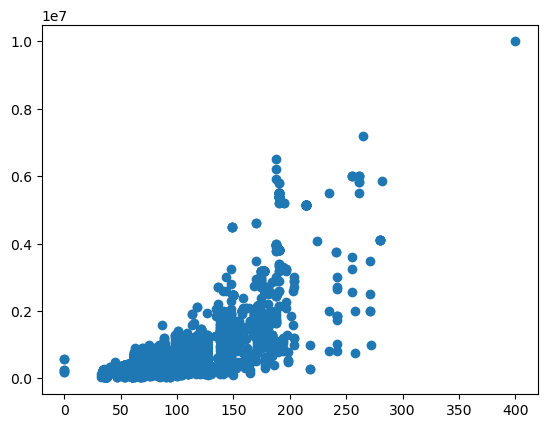

In [12]:
plt.scatter(df['max_power'], df['selling_price'])

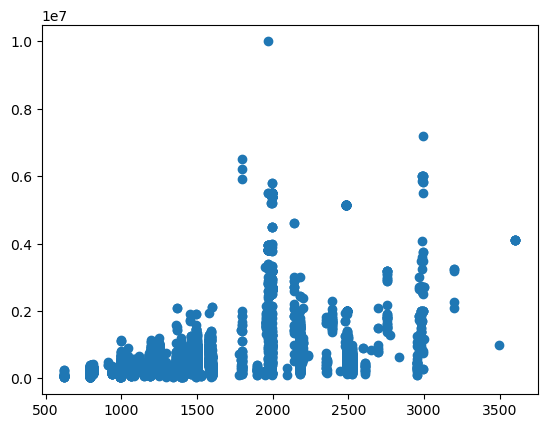

In [13]:
plt.scatter(df['engine'], df['selling_price'])

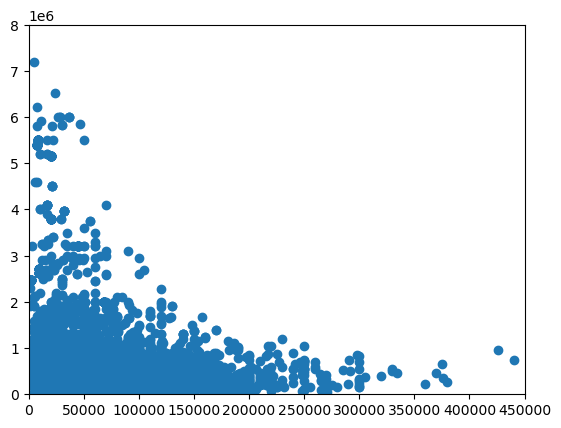

In [14]:
plt.figure()
plt.xlim(0,450000)
plt.ylim(0,8000000)
plt.scatter(df['km_driven'], df['selling_price'])
plt.show()

In [59]:
scaler = MinMaxScaler()

In [49]:
y_train = train_df["selling_price"]
x_train = train_df.drop("selling_price", axis=1)
y_test = test_df["selling_price"]
x_test = test_df.drop("selling_price", axis=1)

In [67]:
description = x_test.describe()
numerical_col = description.columns.tolist()

In [68]:
numerical_col

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [81]:
X_train_scaled = scaler.fit_transform(x_train[numerical_col])
X_test_scaled = scaler.transform(x_test[numerical_col])

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

## Random Forest algorithm

In [96]:
X_test_DT, X_train_DT = X_test_scaled[["year", "fuel", "km_driven"]], X_train_scaled[["year", "fuel", "km_driven"]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [94]:
DT_model = RandomForestRegressor(n_estimators=20, max_features=3, min_samples_leaf=10)

In [90]:
DT_model.fit(x_train_DT, y_train)

RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=20)